### IMPORT LIBRARY

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

### READ DATA

In [78]:
datasets = pd.read_csv('../data/cleaned/clean_all_merged/clean_data_all.csv')

### ANALYSIS DATA

#### Class Distribution

In [79]:
print(datasets['hoax'].value_counts())
print(datasets['hoax'].value_counts(normalize=True))

hoax
0    20504
1    10377
Name: count, dtype: int64
hoax
0    0.663968
1    0.336032
Name: proportion, dtype: float64


#### Variant of Text Length

In [80]:
datasets['text_length'] = datasets['info'].apply(lambda x: len(str(x).split()))
print(datasets['text_length'].describe())

count    30881.000000
mean       247.329167
std        146.318808
min          2.000000
25%        173.000000
50%        219.000000
75%        281.000000
max       3616.000000
Name: text_length, dtype: float64


#### Variant of Words

In [81]:
all_text = " ".join(datasets['info'])
tokens = all_text.split()

ttr = len(set(tokens)) / len(tokens)
print(f"Type-Token Ratio (TTR): {ttr:.4f}")

Type-Token Ratio (TTR): 0.0169


In [82]:
for label in [0, 1]:
    subset = datasets[datasets['hoax'] == label]
    tokens = " ".join(subset['info']).split()
    ttr = len(set(tokens)) / len(tokens)
    print(f"TTR (hoax={label}): {ttr:.4f}")

TTR (hoax=0): 0.0133
TTR (hoax=1): 0.0322


#### General Vocabulary

In [83]:
word_counts = Counter(tokens)
print("20 kata paling umum:")
word_counts.most_common(20)

20 kata paling umum:


[('sebut', 43957),
 ('jelas', 21527),
 ('jadi', 18764),
 ('akun', 18064),
 ('orang', 15271),
 ('indonesia', 14451),
 ('salah', 14046),
 ('informasi', 13562),
 ('bagi', 13267),
 ('kata', 13129),
 ('laku', 12950),
 ('konten', 12871),
 ('lalu', 12277),
 ('fakta', 11357),
 ('unggah', 10517),
 ('tahun', 10409),
 ('edar', 10280),
 ('rupa', 10195),
 ('nyata', 10058),
 ('benar', 9953)]

#### Distribution of Info Length

In [84]:
# Calculate length of each news titles
datasets['info_length'] = datasets['info'].apply(len)

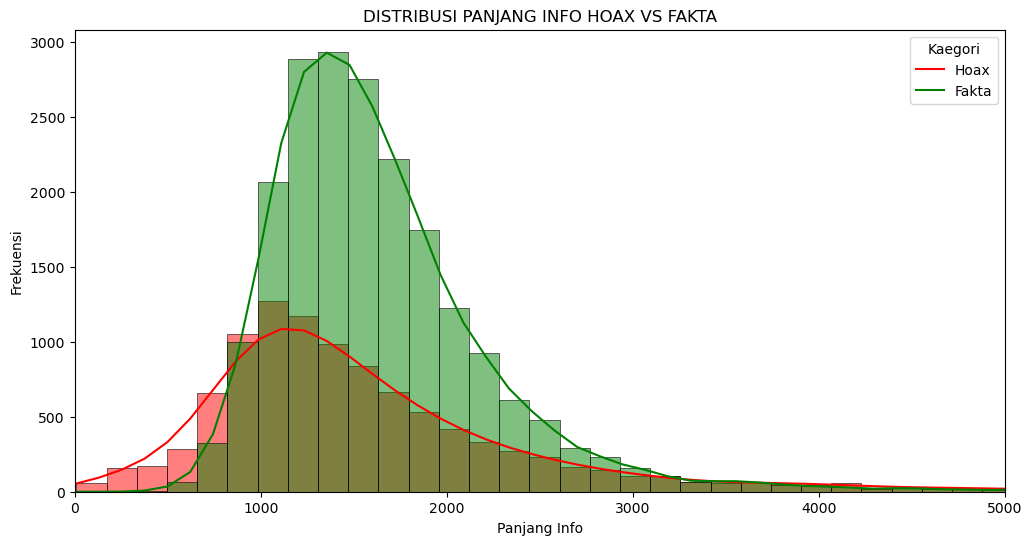

In [85]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=datasets, x='info_length', hue='hoax', 
             kde=True, palette={0: 'green', 1: 'red'}, 
             bins=150, alpha=0.5, legend=True)
plt.title('DISTRIBUSI PANJANG INFO HOAX VS FAKTA')
plt.xlabel('Panjang Info')
plt.ylabel('Frekuensi')
plt.xlim(0, 5000)
ax.legend(title='Kaegori', labels=['Hoax', 'Fakta'])

plt.show()

#### Wordcloud for Fact and Hoax Info

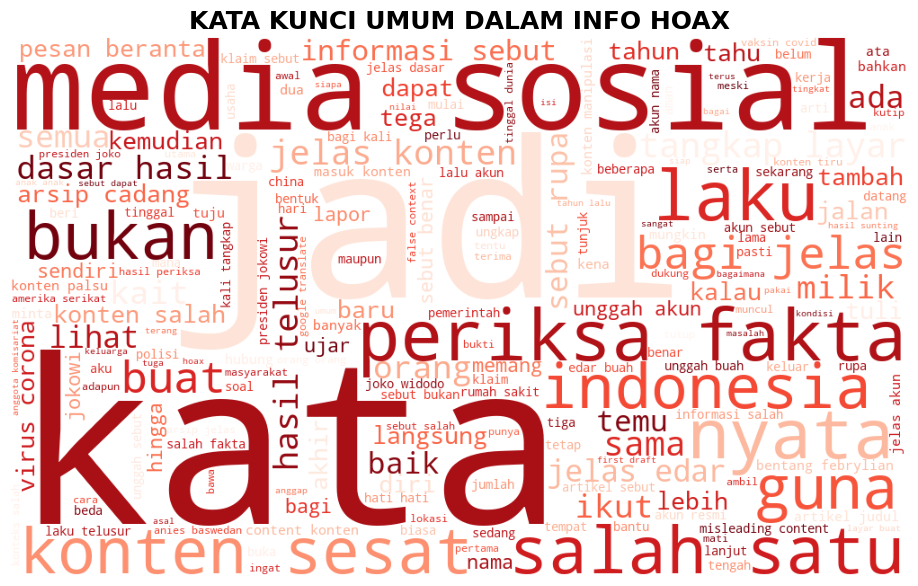

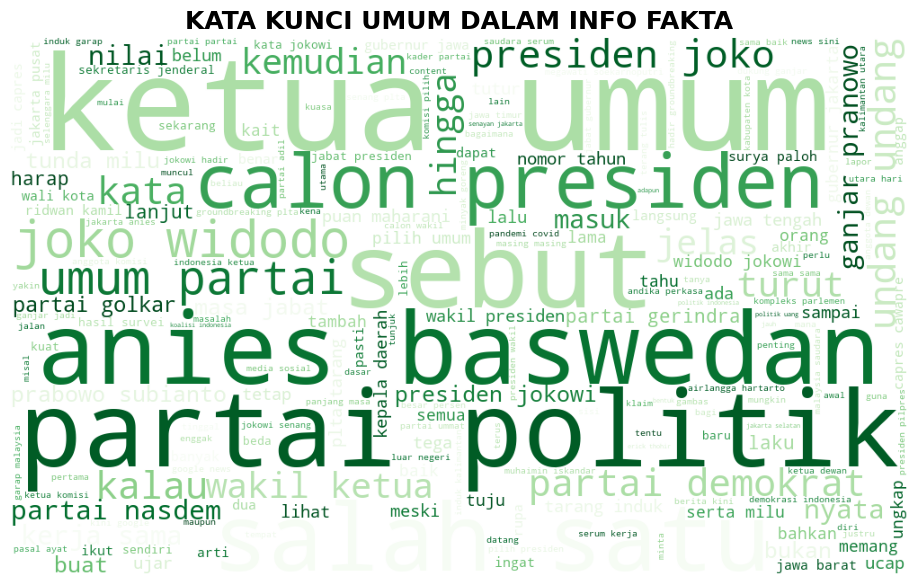

In [86]:
# Take data hoax and fact
hoax_text = ' '.join(datasets[datasets['hoax'] == 1]['info'])
fact_text = ' '.join(datasets[datasets['hoax'] == 0]['info'])

# Word Cloud Hoax
wordcloud_hoax = WordCloud(width=1000, height=600, 
                          background_color='white', 
                          colormap='Reds').generate(hoax_text)
plt.figure(figsize=(12, 7))
plt.imshow(wordcloud_hoax)
plt.title('KATA KUNCI UMUM DALAM INFO HOAX', fontsize=18, fontweight="bold")
plt.axis('off')
plt.show()

# Word Cloud Fakta
wordcloud_fact = WordCloud(width=1000, height=600, 
                          background_color='white', 
                          colormap='Greens').generate(fact_text)
plt.figure(figsize=(12, 7))
plt.imshow(wordcloud_fact)
plt.title('KATA KUNCI UMUM DALAM INFO FAKTA', fontsize=18, fontweight="bold")
plt.axis('off')
plt.show()


#### The Most Frequent Words in Hoax Info

C:\Users\prata\AppData\Local\Temp\ipykernel_9080\353380351.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[count[1] for count in hoax_word_counts],


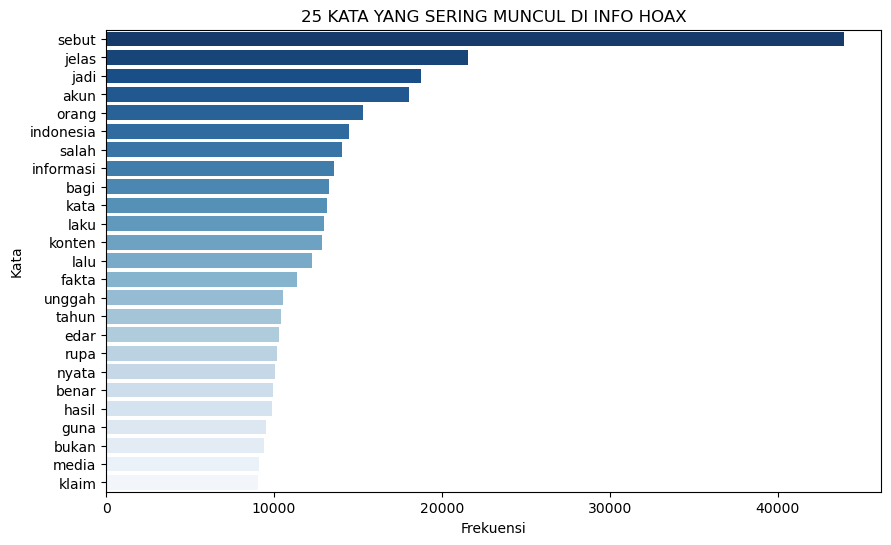

In [87]:
# Calculate unique words in hoax news title
hoax_words = ' '.join(datasets[datasets['hoax'] == 1]['info']).split()
hoax_word_counts = Counter(hoax_words).most_common(25)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=[count[1] for count in hoax_word_counts], 
            y=[count[0] for count in hoax_word_counts], 
            palette='Blues_r')
plt.title('25 KATA YANG SERING MUNCUL DI INFO HOAX')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

#### The Most Frequent Words in Fact Info

C:\Users\prata\AppData\Local\Temp\ipykernel_9080\1920778319.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[count[1] for count in fact_word_count],


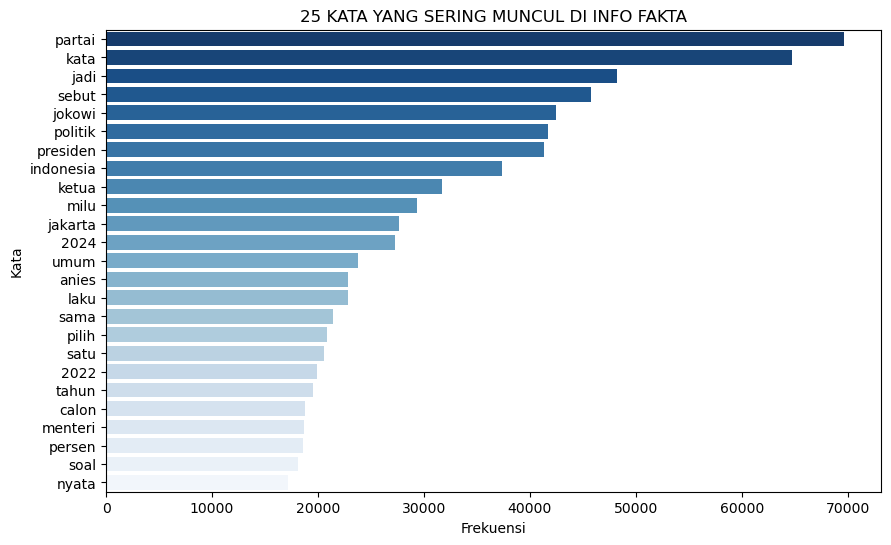

In [88]:
# Calculate unique words in hoax news title
fact_words = ' '.join(datasets[datasets['hoax'] == 0]['info']).split()
fact_word_count = Counter(fact_words).most_common(25)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=[count[1] for count in fact_word_count], 
            y=[count[0] for count in fact_word_count], 
            palette='Blues_r')
plt.title('25 KATA YANG SERING MUNCUL DI INFO FAKTA')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()